In [ ]:
ls

sample_data/


In [ ]:
cd /content/drive/MyDrive/dataset/CNN

/content/drive/MyDrive/dataset/CNN


In [ ]:
ls

Animal_Dataset.zip  task


In [ ]:
pwd

'/content/drive/MyDrive/dataset/CNN'

In [ ]:
!unzip Animal_Dataset.zip

Archive:  Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Tes

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/CNN/dataset/Training",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 1238 images belonging to 4 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/CNN/dataset/Testing",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 326 images belonging to 4 classes.


## **Model Building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(4, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

In [ ]:
len(x_train)

52

In [ ]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
52/52 [==============================] - 16s 300ms/step - loss: 1.5197 - accuracy: 0.3570 - val_loss: 1.2441 - val_accuracy: 0.3773
Epoch 2/5
52/52 [==============================] - 16s 300ms/step - loss: 1.1037 - accuracy: 0.5162 - val_loss: 0.9363 - val_accuracy: 0.6043
Epoch 3/5
52/52 [==============================] - 16s 299ms/step - loss: 0.9339 - accuracy: 0.5929 - val_loss: 1.0147 - val_accuracy: 0.5920
Epoch 4/5
52/52 [==============================] - 16s 302ms/step - loss: 0.8248 - accuracy: 0.6656 - val_loss: 0.6328 - val_accuracy: 0.7791
Epoch 5/5
52/52 [==============================] - 16s 301ms/step - loss: 0.8030 - accuracy: 0.6777 - val_loss: 0.8098 - val_accuracy: 0.7055


In [ ]:
model.save("animal1.h5")

# **Testing of the model**

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [30]:
model = load_model("/content/drive/MyDrive/dataset/CNN/animal1.h5")

In [31]:
img = image.load_img("/content/drive/MyDrive/dataset/CNN/dataset/Training/elephants/2Q__ (2).jpeg",target_size=(64,64))

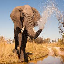

In [32]:
img

In [33]:
x= image.img_to_array(img)

In [34]:
x

array([[[115., 149., 187.],
        [115., 149., 187.],
        [115., 149., 187.],
        ...,
        [113., 145., 184.],
        [112., 144., 183.],
        [125., 159., 197.]],

       [[117., 151., 189.],
        [117., 151., 189.],
        [117., 151., 189.],
        ...,
        [115., 147., 186.],
        [113., 145., 184.],
        [108., 145., 187.]],

       [[119., 153., 191.],
        [119., 153., 191.],
        [119., 153., 191.],
        ...,
        [116., 148., 187.],
        [114., 146., 185.],
        [108., 147., 190.]],

       ...,

       [[216., 151.,  69.],
        [210., 145.,  65.],
        [142.,  76.,   0.],
        ...,
        [133., 107.,  92.],
        [144., 108.,  84.],
        [141.,  89.,  42.]],

       [[193., 130.,  53.],
        [226., 160.,  86.],
        [212., 149.,  78.],
        ...,
        [134., 100.,  90.],
        [121.,  88.,  79.],
        [146., 112.,  85.]],

       [[138.,  84.,  24.],
        [114.,  59.,   2.],
        [146.,  

In [35]:
model.predict(x)

ValueError: ignored

In [37]:
x.ndim

3

In [38]:
x = np.expand_dims(x,axis = 0)

In [39]:
x.ndim

4

In [40]:
pred = model.predict(x)

In [41]:
pred

array([[0., 0., 1., 0.]], dtype=float32)

In [42]:
labels = ["bears","crows","elephants","rats"]

In [44]:
np.argmax(pred)

2

In [45]:
labels[np.argmax(pred)]

'elephants'